In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

from sklearn.metrics import roc_curve, auc

from imblearn.over_sampling import SMOTE

from imblearn.combine import SMOTEENN

In [29]:

df = pd.read_csv('UCI_Credit_Card.csv')


In [30]:

summary_result=[]

In [31]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [32]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [33]:
df.apply(lambda x:sum(x.isnull()))

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [35]:
# for i in df.columns:
#     plt.hist(df[i])
#     plt.xlabel(i)
#     plt.ylabel('frequency')
#     plt.show()

In [36]:
sns.distplot(df['Personal Loan'],kde=False)
plt.show()

KeyError: 'Personal Loan'

# SMOTEENN- Hybrid Sampling method

In [37]:
df_smote=df.copy()
y = df_smote["default.payment.next.month"]
X = df_smote.drop("default.payment.next.month", axis=1)
sm  = SMOTEENN(random_state = 1)
X_res, y_res = sm.fit_resample(X, y)
df_balanced=X_res
df_balanced['default.payment.next.month']=y_res


In [38]:
df_balanced['default.payment.next.month'].value_counts()
new_df = df_balanced.copy()


In [39]:
df_balanced['default.payment.next.month'].value_counts()

1    17460
0    10041
Name: default.payment.next.month, dtype: int64

# Data Processing and Normalization

In [40]:
from sklearn.model_selection import train_test_split



In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(new_df)
scaled_features = scaler.transform(new_df)
new_df = pd.DataFrame(data=scaled_features, columns= new_df.columns.values)

In [42]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,27501.0,0.499920,0.277341,0.0,0.264277,0.502717,0.733456,1.0
LIMIT_BAL,27501.0,0.190751,0.170299,0.0,0.054054,0.139038,0.283784,1.0
SEX,27501.0,0.473910,0.499328,0.0,0.000000,0.000000,1.000000,1.0
EDUCATION,27501.0,0.289365,0.117573,0.0,0.166667,0.333333,0.333333,1.0
MARRIAGE,27501.0,0.472746,0.168863,0.0,0.333333,0.333333,0.666667,1.0
AGE,27501.0,0.264679,0.159357,0.0,0.148148,0.240741,0.370370,1.0
PAY_0,27501.0,0.227875,0.113216,0.0,0.200000,0.200000,0.300000,1.0
PAY_2,27501.0,0.240472,0.135164,0.0,0.111111,0.222222,0.333333,1.0
PAY_3,27501.0,0.210040,0.121188,0.0,0.100000,0.200000,0.200000,1.0
PAY_4,27501.0,0.226873,0.135486,0.0,0.111111,0.222222,0.222222,1.0


In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=24)

In [47]:
pca.fit(new_df)

PCA(n_components=24)

In [48]:
print(pca.explained_variance_ratio_)

[3.85054697e-01 2.40868357e-01 9.66369424e-02 8.26262729e-02
 5.90298135e-02 4.30229510e-02 2.12621098e-02 2.05965639e-02
 1.30826901e-02 1.24651451e-02 6.72202004e-03 5.11666360e-03
 3.41579863e-03 2.64696468e-03 2.46465296e-03 1.26645614e-03
 1.08738526e-03 6.69548069e-04 6.16485509e-04 5.17355094e-04
 2.89240511e-04 2.18501127e-04 1.55716962e-04 1.29215722e-04]


In [49]:
pca = PCA(n_components=10)
# new_df = pca.fit_transform(new_df)


In [23]:
# new_df.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [29]:
# from scipy.stats import pearsonr

In [30]:
# for eachValue in new_df.columns:    
#     corr, _ = pearsonr(new_df[eachValue], new_df['default.payment.next.month'])
#     print('{0} : {1}'.format( eachValue, corr))


ID : -0.03258462535330242
LIMIT_BAL : -0.3260097860725662
SEX : -0.22771064661857965
EDUCATION : -0.07161478120688394
MARRIAGE : -0.2017836514441625
AGE : -0.01725117450334847
PAY_0 : 0.3856470646437605
PAY_2 : 0.3363947939394317
PAY_3 : 0.3142304162623033
PAY_4 : 0.2914363146748079
PAY_5 : 0.27869897349236844
PAY_6 : 0.26188016073956927
BILL_AMT1 : -0.03879643705307247
BILL_AMT2 : -0.026970020245707587
BILL_AMT3 : -0.024906737604187202
BILL_AMT4 : -0.01670236612784391
BILL_AMT5 : -0.009897695052861479
BILL_AMT6 : -0.007335823854109835
PAY_AMT1 : -0.1818115793675741
PAY_AMT2 : -0.1477003607826861
PAY_AMT3 : -0.1433888848755251
PAY_AMT4 : -0.15899913695473944
PAY_AMT5 : -0.15206386704900826
PAY_AMT6 : -0.14028728478732835
default.payment.next.month : 1.0


In [31]:
# new_df=new_df.drop('ID',axis=1)
# new_df=new_df.drop('LIMIT_BAL',axis=1)
# new_df=new_df.drop('SEX',axis=1)
# new_df=new_df.drop('EDUCATION',axis=1)
# new_df=new_df.drop('MARRIAGE',axis=1)
# new_df=new_df.drop('AGE',axis=1)
# new_df=new_df.drop('BILL_AMT1',axis=1)
# new_df=new_df.drop('BILL_AMT2',axis=1)
# new_df=new_df.drop('BILL_AMT3',axis=1)
# new_df=new_df.drop('BILL_AMT4',axis=1)
# new_df=new_df.drop('BILL_AMT5',axis=1)
# new_df=new_df.drop('BILL_AMT6',axis=1)
# new_df=new_df.drop('PAY_AMT1',axis=1)
# new_df=new_df.drop('PAY_AMT2',axis=1)
# new_df=new_df.drop('PAY_AMT3',axis=1)
# new_df=new_df.drop('PAY_AMT4',axis=1)
# new_df=new_df.drop('PAY_AMT5',axis=1)
# new_df=new_df.drop('PAY_AMT6',axis=1)

In [70]:
y_original=new_df['default.payment.next.month']
X_original=new_df.drop('default.payment.next.month', axis=1)

In [71]:
X_original=pca.fit_transform(X_original)

In [72]:
X_original=pd.DataFrame(X_original)

In [59]:
type(X_original)

pandas.core.frame.DataFrame

In [60]:
X, x_test, y,y_test=train_test_split(X_original,y_original,test_size=0.2)

In [68]:
X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.368528,0.000000,0.0,0.166667,0.333333,0.185185,0.5,0.444444,0.3,0.333333,...,0.025400,0.224061,0.147841,0.292310,0.000441,0.000230,0.000120,0.000687,0.000810,0.000796
1,0.312352,0.027027,1.0,0.500000,0.333333,0.500000,0.4,0.444444,0.2,0.222222,...,0.035564,0.250061,0.180828,0.320892,0.000000,0.001226,0.004330,0.000325,0.002231,0.002081
2,0.886648,0.013514,0.0,0.333333,0.333333,0.111111,0.2,0.222222,0.2,0.222222,...,0.030406,0.231111,0.133917,0.307284,0.001717,0.000769,0.001350,0.001005,0.045866,0.001188
3,0.907085,0.517899,0.0,0.166667,0.666667,0.333333,0.0,0.000000,0.0,0.000000,...,0.020041,0.212835,0.132883,0.279362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000017
4,0.568528,0.054054,1.0,0.333333,0.666667,0.018519,0.2,0.222222,0.4,0.222222,...,0.040454,0.256672,0.190926,0.282987,0.004236,0.000000,0.001350,0.001143,0.000122,0.001892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27496,0.199667,0.283784,0.0,0.166667,0.333333,0.444444,0.3,0.444444,0.2,0.222222,...,0.112498,0.411566,0.397800,0.510824,0.000000,0.004512,0.006411,0.009662,0.014067,0.023266
27497,0.254176,0.013514,1.0,0.500000,1.000000,0.500000,0.2,0.222222,0.2,0.222222,...,0.031195,0.236321,0.163322,0.305497,0.001497,0.000946,0.000900,0.001127,0.001737,0.001004
27498,0.669045,0.072319,1.0,0.166667,0.333333,0.370370,0.2,0.222222,0.2,0.222222,...,0.052794,0.280111,0.178504,0.320146,0.003837,0.001616,0.005574,0.005783,0.005908,0.002014
27499,0.770762,0.148649,1.0,0.500000,0.333333,0.351852,0.2,0.222222,0.2,0.222222,...,0.061777,0.293218,0.233767,0.362939,0.003438,0.001676,0.002828,0.002789,0.004117,0.003195


In [62]:
test_df=x_test
test_df['default.payment.next.month']=y_test

/var/folders/5d/jfk9yxr101l6s9055y3dfrjh0000gn/T/ipykernel_15870/664457664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['default.payment.next.month']=y_test


In [38]:
new_df=X
new_df['default.payment.next.month']=y

/var/folders/5d/jfk9yxr101l6s9055y3dfrjh0000gn/T/ipykernel_14473/13436127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['default.payment.next.month']=y


In [67]:
test_df=test_df.sample(frac=1).reset_index(drop=True)
new_df=new_df.sample(frac=1).reset_index(drop=True)

In [64]:
test_df['default.payment.next.month'].value_counts()
X = new_df.drop('default.payment.next.month',axis=1)
y = new_df['default.payment.next.month']



In [65]:
new_df['default.payment.next.month'].value_counts()

1.0    17460
0.0    10041
Name: default.payment.next.month, dtype: int64

In [66]:
new_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0.368528,0.000000,0.0,0.166667,0.333333,0.185185,0.5,0.444444,0.3,0.333333,...,0.224061,0.147841,0.292310,0.000441,0.000230,0.000120,0.000687,0.000810,0.000796,1.0
1,0.312352,0.027027,1.0,0.500000,0.333333,0.500000,0.4,0.444444,0.2,0.222222,...,0.250061,0.180828,0.320892,0.000000,0.001226,0.004330,0.000325,0.002231,0.002081,1.0
2,0.886648,0.013514,0.0,0.333333,0.333333,0.111111,0.2,0.222222,0.2,0.222222,...,0.231111,0.133917,0.307284,0.001717,0.000769,0.001350,0.001005,0.045866,0.001188,0.0
3,0.907085,0.517899,0.0,0.166667,0.666667,0.333333,0.0,0.000000,0.0,0.000000,...,0.212835,0.132883,0.279362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000017,1.0
4,0.568528,0.054054,1.0,0.333333,0.666667,0.018519,0.2,0.222222,0.4,0.222222,...,0.256672,0.190926,0.282987,0.004236,0.000000,0.001350,0.001143,0.000122,0.001892,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27496,0.199667,0.283784,0.0,0.166667,0.333333,0.444444,0.3,0.444444,0.2,0.222222,...,0.411566,0.397800,0.510824,0.000000,0.004512,0.006411,0.009662,0.014067,0.023266,0.0
27497,0.254176,0.013514,1.0,0.500000,1.000000,0.500000,0.2,0.222222,0.2,0.222222,...,0.236321,0.163322,0.305497,0.001497,0.000946,0.000900,0.001127,0.001737,0.001004,0.0
27498,0.669045,0.072319,1.0,0.166667,0.333333,0.370370,0.2,0.222222,0.2,0.222222,...,0.280111,0.178504,0.320146,0.003837,0.001616,0.005574,0.005783,0.005908,0.002014,1.0
27499,0.770762,0.148649,1.0,0.500000,0.333333,0.351852,0.2,0.222222,0.2,0.222222,...,0.293218,0.233767,0.362939,0.003438,0.001676,0.002828,0.002789,0.004117,0.003195,0.0


In [43]:
X_test = test_df.drop('default.payment.next.month',axis=1)
y_test = test_df['default.payment.next.month']

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
n_splits=10
kf=KFold(n_splits=n_splits, random_state=None)


In [46]:
def k_fold_cross_validated_score(model,X,y):
    best_model=''
    best_accuracy=0
    average_accuracy=0
    scores=cross_val_score(model, X, y, cv=10 )
    best_accuracy=scores.max()
    average_accuracy=scores.mean()
    return best_model, best_accuracy, average_accuracy



# Logistic Regression

In [47]:

model=LogisticRegression()

In [48]:
k_fold_cross_validated_score(model, X, y)

('', 0.6836363636363636, 0.6779999999999999)

In [49]:
def k_fold_cross_validated_result(model):
    best_model=''
    best_accuracy=0
    average_accuracy=0
    acc_score=[]
    
    for train_index, test_index in kf.split(X):
        x_train, x_heldout=X.iloc[train_index, : ], X.iloc[test_index, :]
        y_train, y_heldout=y[train_index], y[test_index]
        model.fit(x_train, y_train)
        pred_values = model.predict(x_heldout)
        
        acc = accuracy_score(pred_values, y_heldout)
        if acc > best_accuracy:
            best_accuracy=acc
            best_model=model
        acc_score.append(acc)
    average_accuracy=sum(acc_score)/len(acc_score)

    return best_model, best_accuracy, average_accuracy





In [50]:

m, best_acc, avg_acc=k_fold_cross_validated_result(model)

print('Model : {0}, best Accuracy : {1}, Average Accuracy : {2}'.format(m, best_acc, avg_acc))


Model : LogisticRegression(), best Accuracy : 0.6877272727272727, Average Accuracy : 0.678


In [51]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.678, training best accuracy: 0.6877272727272727,  test accuracy : 0.6720596255226322 


In [52]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Logistic Regression',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy 
}
summary_result.append(item)

# Linear Perceptron

In [53]:
from sklearn.linear_model import Perceptron

In [54]:
model=Perceptron()



In [55]:
m, best_acc, avg_acc= k_fold_cross_validated_result(model)

In [56]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.6609090909090909, training best accuracy: 0.6913636363636364,  test accuracy : 0.6406107980367206 


In [57]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Linear Perceptron',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy 
 }
summary_result.append(item)

# Support Vector Machine

In [58]:
from sklearn.svm import SVC 

In [59]:
X_train_support,X_test_support,y_train_support,y_test_support = train_test_split(X,y,train_size=0.85,random_state=1)

In [62]:
    c = [0.01, 0.1, 1, 2, 3, 5]
    for cost_c in c:
        model=SVC(C=cost_c, kernel='linear')
        model.fit(X_train_support,y_train_support)
        y_pred=model.predict(X_test_support)
        print("C: {0}, accuracy : {1}".format(cost_c, accuracy_score(y_pred, y_test_support)))

C: 0.01, accuracy : 0.6596969696969697
C: 0.1, accuracy : 0.6781818181818182
C: 1, accuracy : 0.6772727272727272
C: 2, accuracy : 0.6763636363636364
C: 3, accuracy : 0.6763636363636364
C: 5, accuracy : 0.6757575757575758


In [63]:
    c = [0.01, 0.1, 1, 2, 3, 5]
    kernel_func=['linear', 'poly', 'rbf']

    for k in kernel_func:
        for cost_c in c:
            model=SVC(C=cost_c, kernel=k)
            model.fit(X_train_support,y_train_support)
            y_pred=model.predict(X_test_support)
            print("kernel : {0}, C: {1}, a: {2}".format(k, cost_c, accuracy_score(y_pred,y_test_support)))

kernel : linear, C: 0.01, a: 0.6596969696969697
kernel : linear, C: 0.1, a: 0.6781818181818182
kernel : linear, C: 1, a: 0.6772727272727272
kernel : linear, C: 2, a: 0.6763636363636364
kernel : linear, C: 3, a: 0.6763636363636364
kernel : linear, C: 5, a: 0.6757575757575758
kernel : poly, C: 0.01, a: 0.7015151515151515
kernel : poly, C: 0.1, a: 0.6639393939393939
kernel : poly, C: 1, a: 0.6572727272727272
kernel : poly, C: 2, a: 0.6603030303030303
kernel : poly, C: 3, a: 0.656969696969697
kernel : poly, C: 5, a: 0.6612121212121213
kernel : rbf, C: 0.01, a: 0.6712121212121213
kernel : rbf, C: 0.1, a: 0.6833333333333333
kernel : rbf, C: 1, a: 0.7263636363636363
kernel : rbf, C: 2, a: 0.7269696969696969
kernel : rbf, C: 3, a: 0.7245454545454545
kernel : rbf, C: 5, a: 0.7306060606060606


In [64]:
model=SVC(C=2, kernel='rbf')


m, best_acc, avg_acc=k_fold_cross_validated_result(model)
print(best_acc)


0.7427272727272727


In [65]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.7297272727272728, training best accuracy: 0.7427272727272727,  test accuracy : 0.7305944373750227 


In [66]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Support Vector machine',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
summary_result.append(item)

# Decision Tree

In [153]:
from sklearn import tree

In [154]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train_support, y_train_support)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

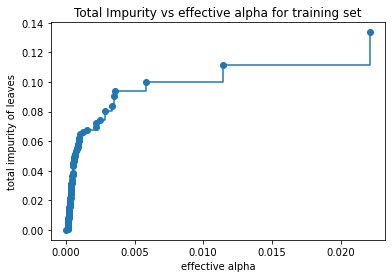

In [155]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [156]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_support, y_train_support)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.36302459486079997


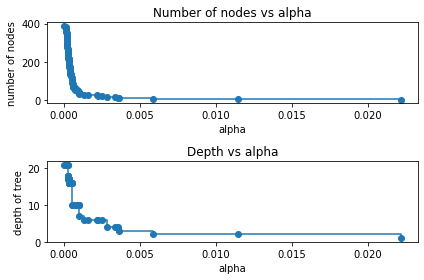

In [157]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

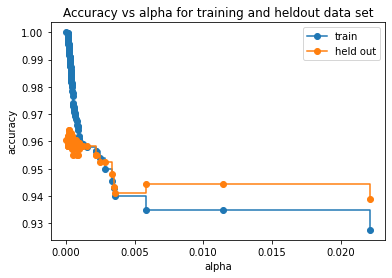

In [158]:
train_scores = [clf.score(X_train_support, y_train_support) for clf in clfs]
test_scores = [clf.score(X_test_support, y_test_support) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and heldout data set")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="held out", drawstyle="steps-post")
ax.legend()
plt.show()

In [159]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train_support, y_train_support))
print('Test accuracy of best model: ',best_model.score(X_test_support, y_test_support))

Training accuracy of best model:  0.9942868802285247
Test accuracy of best model:  0.9641618497109826


In [160]:
model=best_model
m, best_acc, avg_acc=k_fold_cross_validated_result(model)
print(best_acc)
print(model.ccp_alpha)

0.9774696707105719
0.0002244439910222404


In [161]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.9604575871365298, training best accuracy: 0.9774696707105719,  test accuracy : 0.949375866851595 


In [162]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Decision Tree',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
summary_result.append(item)

# Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
min_error=1
error_rate = []
for n_estmtrs in range(1,70,5):
    for dep in range(1,10):
        rf = RandomForestClassifier(n_estimators=n_estmtrs, max_depth=dep)
        rf.fit(X_train_support,y_train_support)
        pred_i = rf.predict(X_test_support)
        error=np.mean(pred_i != y_test_support)
        error_rate.append(error)
        if min_error> error:
            min_error=error

        if error == min_error :
            print("n_estmtrs: {0}, depth : {1}, error: {2} : ".format(n_estmtrs, dep, min_error))

print(min_error)

n_estmtrs: 1, depth : 1, error: 0.1907514450867052 : 
n_estmtrs: 1, depth : 2, error: 0.16878612716763006 : 
n_estmtrs: 1, depth : 3, error: 0.05086705202312139 : 
n_estmtrs: 1, depth : 9, error: 0.04277456647398844 : 
n_estmtrs: 6, depth : 7, error: 0.03815028901734104 : 
n_estmtrs: 6, depth : 8, error: 0.03005780346820809 : 
n_estmtrs: 31, depth : 8, error: 0.03005780346820809 : 
n_estmtrs: 51, depth : 9, error: 0.03005780346820809 : 
n_estmtrs: 61, depth : 9, error: 0.03005780346820809 : 
0.03005780346820809


Text(0, 0.5, 'Error Rate')

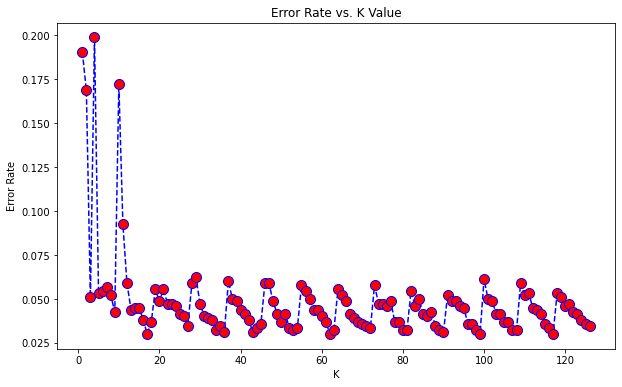

In [165]:
plt.figure(figsize=(10,6))
plt.plot(range(1,127),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [166]:
model=RandomForestClassifier(n_estimators=18, max_depth=8)
m, best_acc, avg_acc=k_fold_cross_validated_result(model)


In [167]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.9580303413248604, training best accuracy: 0.9705372616984402,  test accuracy : 0.9549237170596394 


In [168]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Random Forest',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
summary_result.append(item)

# K nearest neighbours

In [169]:
from sklearn.neighbors import KNeighborsClassifier


In [170]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_support,y_train_support)
    pred_i = knn.predict(X_test_support)
    error_rate.append(np.mean(pred_i != y_test_support))

Text(0, 0.5, 'Error Rate')

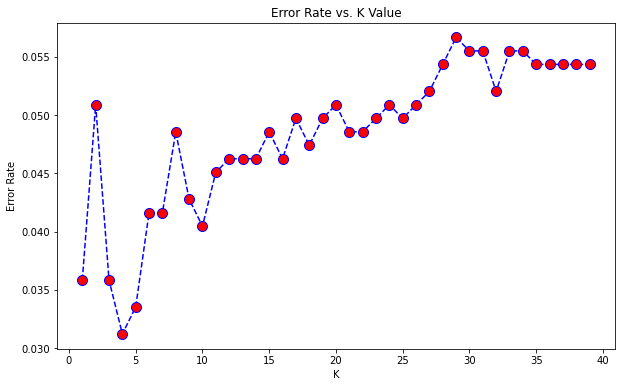

In [171]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [172]:

model=KNeighborsClassifier(n_neighbors=4)
m, best_acc, avg_acc=k_fold_cross_validated_result(model)
print(best_acc)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

0.9670138888888888
training average accuracy: 0.9547374470440978, training best accuracy: 0.9670138888888888,  test accuracy : 0.9535367545076283 


In [173]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Knn',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
summary_result.append(item)

# Naive Bayes

In [174]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
m, best_acc, avg_acc=k_fold_cross_validated_result(model)
print(best_acc)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

0.925476603119584
training average accuracy: 0.9087723257269401, training best accuracy: 0.925476603119584,  test accuracy : 0.9237170596393898 


In [175]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Naive Bayes',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
summary_result.append(item)

# Ada boost

In [176]:
from sklearn.ensemble import AdaBoostClassifier

In [209]:
error_rate=[]
for num_samples in range(1,50):
    model= AdaBoostClassifier(n_estimators=num_samples, random_state=0)
    model.fit(X, y)
    score=model.score(X, y)
    pred_i = model.predict(X_test_support)
    error_rate.append(np.mean(pred_i != y_test_support))
    print('number of samples: {0}, accuracy : {1}'.format(num_samples, score))


    


number of samples: 1, accuracy : 0.9292403746097815
number of samples: 2, accuracy : 0.9292403746097815
number of samples: 3, accuracy : 0.9292403746097815
number of samples: 4, accuracy : 0.9292403746097815
number of samples: 5, accuracy : 0.9290669441553937
number of samples: 6, accuracy : 0.9311481096080472
number of samples: 7, accuracy : 0.9347901491501908
number of samples: 8, accuracy : 0.932188692334374
number of samples: 9, accuracy : 0.9368713146028442
number of samples: 10, accuracy : 0.9340964273326396
number of samples: 11, accuracy : 0.9363510232396809
number of samples: 12, accuracy : 0.9387790496011099
number of samples: 13, accuracy : 0.9372181755116198
number of samples: 14, accuracy : 0.9401664932362123
number of samples: 15, accuracy : 0.945369406867846
number of samples: 16, accuracy : 0.945369406867846
number of samples: 17, accuracy : 0.9458896982310093
number of samples: 18, accuracy : 0.9451959764134582
number of samples: 19, accuracy : 0.9441553936871314
numbe

Text(0, 0.5, 'Error Rate')

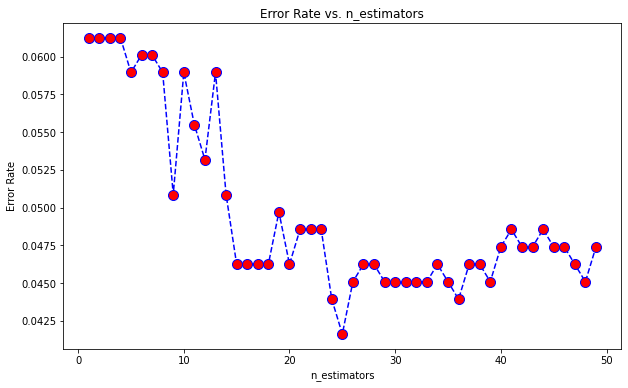

In [210]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')

In [179]:

model= AdaBoostClassifier(n_estimators=25, random_state=0).fit(X, y)

m, best_acc, avg_acc=k_fold_cross_validated_score(model, X, y)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.942420987386867, training best accuracy: 0.9566724436741768,  test accuracy : 0.9514563106796117 


In [180]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'AdaBoost',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
summary_result.append(item)

# Artificial Neural Network

In [181]:

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

In [182]:
EPOCHS = 1500
BATCH_SIZE = 64
LEARNING_RATE = 0.01

In [183]:
X = new_df.drop('Personal Loan',axis=1)
y = new_df['Personal Loan']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)

In [185]:
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train.values), 
                       torch.FloatTensor(y_train.values))


In [186]:
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test.values))

In [187]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [188]:
class NeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1=nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 84)
        self.fc3 = nn.Linear(84, 64)
        self.fc4 = nn.Linear(64, output_dim)
        self.relu=nn.ReLU()
        self.dropout_layer= nn.Dropout(0.3)
        self.sigmoid=nn.Sigmoid()
        self.batch_norm=nn.BatchNorm1d(64)
       

    def forward(self, X):
        X = self.relu(self.fc1(X))
        #X = self.batch_norm(X)
        X = self.relu(self.fc2(X))
        #X = self.batch_norm(X)
        X = self.relu(self.fc3(X))
        X = self.batch_norm(X)
        X = self.dropout_layer(X)
        return self.sigmoid(self.fc4(X))




model = NeuralNet(7,0,1)

In [189]:
from torch.optim import Adam

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [190]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [191]:
avg_acc=0
best_acc=0
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()

        y_pred = model(X_batch)
        loss = criterion(y_pred.view(-1), y_batch)
        acc = binary_acc(y_pred.view(-1), y_batch)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    if e % 50 == 0:
        print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')
    avg_acc = avg_acc + epoch_acc/len(train_loader)
    if best_acc < epoch_acc/len(train_loader):
        best_acc=epoch_acc/len(train_loader)


Epoch 050: | Loss: 0.12324 | Acc: 53.918
Epoch 100: | Loss: 0.11131 | Acc: 53.589
Epoch 150: | Loss: 0.09084 | Acc: 54.014
Epoch 200: | Loss: 0.07399 | Acc: 53.781
Epoch 250: | Loss: 0.07109 | Acc: 54.329
Epoch 300: | Loss: 0.05010 | Acc: 53.699
Epoch 350: | Loss: 0.14809 | Acc: 53.616
Epoch 400: | Loss: 0.05969 | Acc: 53.671
Epoch 450: | Loss: 0.04130 | Acc: 53.671
Epoch 500: | Loss: 0.05493 | Acc: 53.342
Epoch 550: | Loss: 0.03828 | Acc: 55.781
Epoch 600: | Loss: 0.03729 | Acc: 53.836
Epoch 650: | Loss: 0.03276 | Acc: 54.068
Epoch 700: | Loss: 0.03456 | Acc: 54.096
Epoch 750: | Loss: 0.03608 | Acc: 53.781
Epoch 800: | Loss: 0.04124 | Acc: 53.658
Epoch 850: | Loss: 0.03305 | Acc: 59.096
Epoch 900: | Loss: 0.03870 | Acc: 57.740
Epoch 950: | Loss: 0.03417 | Acc: 53.836
Epoch 1000: | Loss: 0.02583 | Acc: 53.781
Epoch 1050: | Loss: 0.02253 | Acc: 54.507
Epoch 1100: | Loss: 0.06388 | Acc: 53.205
Epoch 1150: | Loss: 0.02742 | Acc: 53.959
Epoch 1200: | Loss: 0.36712 | Acc: 53.836
Epoch 1250:

In [192]:
avg_acc =avg_acc/len(train_loader)

In [194]:
avg_acc=best_acc

In [196]:
avg_acc

74.89041095890411

In [197]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [198]:

accuracy=accuracy_score(y_pred_list, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 74.89041095890411, training best accuracy: 74.89041095890411,  test accuracy : 0.5762564991334489 


In [199]:
y_pred=y_pred_list
y_test=y_test

In [200]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Artificial Neural Network',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
summary_result.append(item)

# MLP

In [201]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [202]:
error_rate=[]
for num_iter in range(1,100):
    model= MLPClassifier(random_state=1, max_iter=num_iter)
    model.fit(X, y)
    score=model.score(X, y)
    pred_i = model.predict(X_test_support)
    error_rate.append(np.mean(pred_i != y_test_support))
    if num_iter % 30 ==0:
        print('number of iterations: {0}, accuracy : {1}'.format(num_iter, score))



/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/

number of iterations: 30, accuracy : 0.942074228234478


/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (31) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (33) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anacon

number of iterations: 60, accuracy : 0.9455428373222338


/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (61) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (62) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (63) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (64) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anacon

number of iterations: 90, accuracy : 0.9458896982310093


/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (91) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (92) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (93) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (94) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anacon

Text(0, 0.5, 'Error Rate')

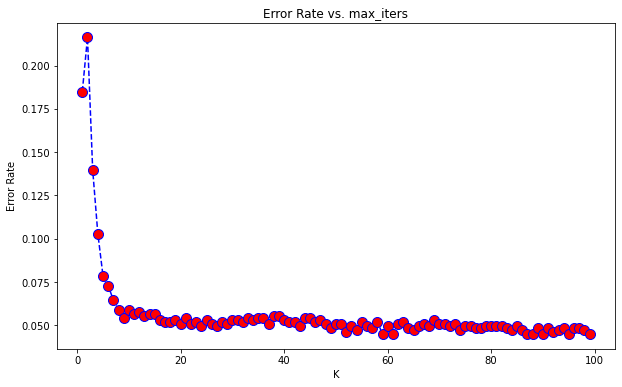

In [203]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. max_iters')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [204]:
model= MLPClassifier(max_iter=61, random_state=1)
model.fit(X, y)
m, best_acc, avg_acc=k_fold_cross_validated_score(model, X, y)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (61) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (61) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (61) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (61) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rayhan/opt/anacon

training average accuracy: 0.9424224918159061, training best accuracy: 0.9549393414211439,  test accuracy : 0.9480069324090121 


/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (61) reached and the optimization hasn't converged yet.
  warnings.warn(


In [205]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'MLPClassifier',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
summary_result.append(item)

# ROC CURVE 

In [206]:
for result in summary_result:
    print('Model:{0}, Traning Accuracy= {1}, Test Accuracy= {2}'.format(
        result['model'], result['average_train_accuracy'], result['test_accuracy'] ))

Model:Logistic Regression, Traning Accuracy= 0.9340960788561524, Test Accuracy= 0.9368932038834952
Model:Linear Perceptron, Traning Accuracy= 0.8144741117850952, Test Accuracy= 0.7704576976421637
Model:Support Vector machine, Traning Accuracy= 0.9471057794145967, Test Accuracy= 0.9438280166435506
Model:Decision Tree, Traning Accuracy= 0.9604575871365298, Test Accuracy= 0.949375866851595
Model:Random Forest, Traning Accuracy= 0.9580303413248604, Test Accuracy= 0.9549237170596394
Model:Knn, Traning Accuracy= 0.9547374470440978, Test Accuracy= 0.9535367545076283
Model:Naive Bayes, Traning Accuracy= 0.9087723257269401, Test Accuracy= 0.9237170596393898
Model:AdaBoost, Traning Accuracy= 0.942420987386867, Test Accuracy= 0.9514563106796117
Model:Artificial Neural Network, Traning Accuracy= 74.89041095890411, Test Accuracy= 0.5762564991334489
Model:MLPClassifier, Traning Accuracy= 0.9424224918159061, Test Accuracy= 0.9480069324090121


Text(0.5, 0, 'False Positive Rate')

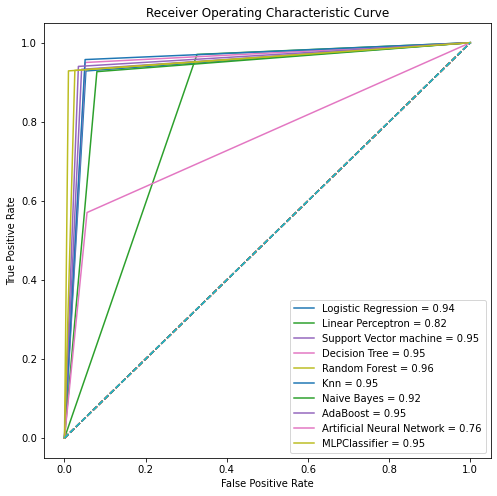

In [208]:
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic Curve')

for result in summary_result:
    plt.plot(result['false_positive_rate'],result['true_positive_rate'],label =result['model'] +' = %0.2f' % result['roc_auc'])
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')

plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')